In [7]:
import cv2
import numpy as np

In [8]:
# Load the image
image = cv2.imread('twoll.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [9]:
# Apply Canny edge detection to identify edges
edges = cv2.Canny(gray, 50, 150)

In [10]:
# Find lines using Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

In [11]:
# Ensure lines were detected
if lines is not None:
    # Calculate distance between lines
    if len(lines) >= 2:
        line1 = lines[0][0]
        line2 = lines[1][0]
        
        # Get the coordinates of the lines
        x1, y1, x2, y2 = line1
        x3, y3, x4, y4 = line2
        
        # Calculate the distance using Euclidean distance formula
        distance = np.sqrt((x1 - x3)**2 + (y1 - y3)**2)
        
        # Print the distance
        print("Distance between the lines:", distance)
    else:
        print("Insufficient lines detected.")
else:
    print("No lines detected in the image.")

Distance between the lines: 5.385164807134504


In [12]:
print(x1,y1)
print(x2,y2)

89 402
603 402


In [14]:
gray.shape

(612, 722)

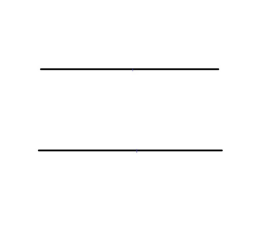

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis
plt.show()

In [ ]:
import cv2
import math

# Global variables
clicked_points = []
distance = 0

def click_event(event, x, y, flags, param):
    global clicked_points, distance

    # Left button click event
    if event == cv2.EVENT_LBUTTONDOWN:
        clicked_points.append((x, y))

        # Calculate distance if two points have been selected
        if len(clicked_points) == 2:
            distance = math.sqrt((clicked_points[0][0] - clicked_points[1][0]) ** 2 + (clicked_points[0][1] - clicked_points[1][1]) ** 2)
            print("Distance between the lines:", distance)

            # Reset clicked points for next measurement
            clicked_points = []

# Load the image
image = cv2.imread('twoll.jpg')

# Create a window and bind the click event function
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', click_event)

while True:
    # Display the image
    cv2.imshow('Image', image)

    # Wait for key press
    key = cv2.waitKey(1) & 0xFF

    # Exit if 'q' is pressed
    if key == ord('q'):
        break

# Release resources and close the windows
cv2.destroyAllWindows()